<a href="https://colab.research.google.com/github/Bhanu-Bhakta01/Emoji-Detection/blob/main/emoji.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [ ]:
# Load the dataset
dataset = pd.read_csv("/content/drive/MyDrive/emotion_dataset.csv")

In [ ]:
# Data Cleaning
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r"[^a-z\s]", "", text)
    # Remove extra whitespace
    text = re.sub(r"\s+", " ", text).strip()
    return text

In [ ]:
dataset['sentence'] = dataset['sentence'].apply(clean_text)


<ipython-input-6-b362dc525dd0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emoji_percentage.index, y=emoji_percentage.values, palette="plasma")


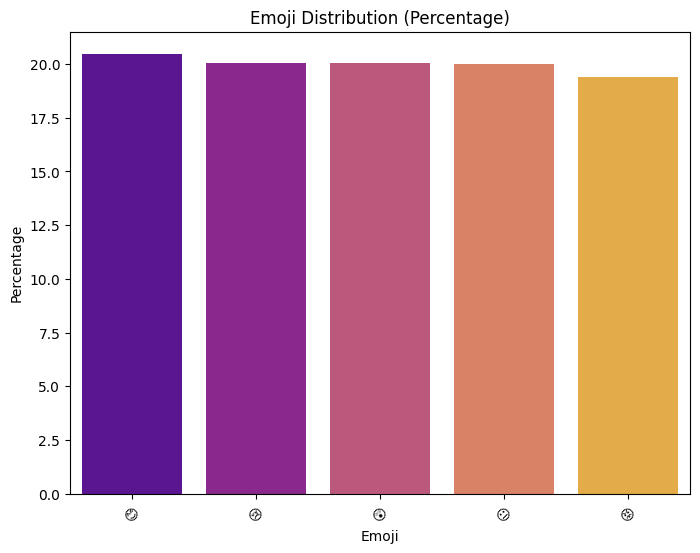

In [ ]:
# Emoji distribution as percentages
emoji_percentage = dataset['emoji'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 6))
sns.barplot(x=emoji_percentage.index, y=emoji_percentage.values, palette="plasma")
plt.title("Emoji Distribution (Percentage)")
plt.xlabel("Emoji")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
plt.show()

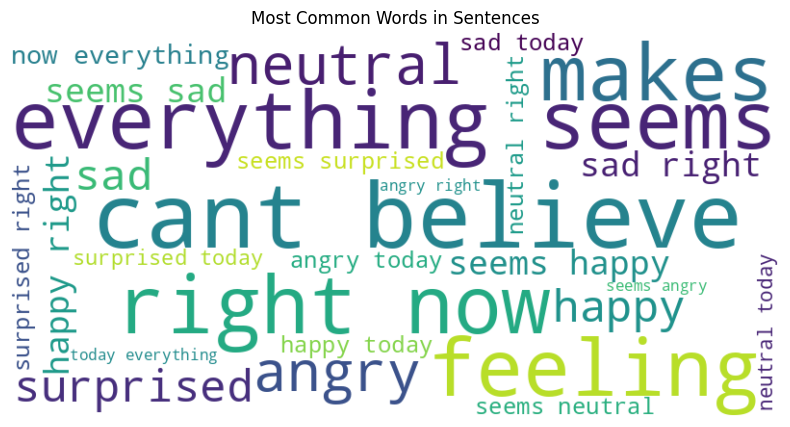

In [ ]:
# Word cloud of most common words in the dataset
all_text = " ".join(dataset['sentence'])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Sentences")
plt.show()

In [ ]:
dataset.head()

,sentence,emoji
0,this makes me neutral,😐
1,everything seems angry right now,😡
2,i just cant believe how angry this is,😡
3,everything seems sad right now,😢
4,why is this so surprised,😲


In [ ]:
# encode the emoji column into numerical labels
label_encoder = LabelEncoder()
dataset['emoji_encoded'] = label_encoder.fit_transform(dataset['emoji'])

In [ ]:
# Tokenize and pad sequences
vocab_size = 5000
embedding_dim = 50
max_length = 20
oov_token = "<OOV>"

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(dataset['sentence'])
sequences = tokenizer.texts_to_sequences(dataset['sentence'])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')


In [ ]:
# Convert labels to categorical
num_classes = len(label_encoder.classes_)
y_categorical = to_categorical(dataset['emoji_encoded'], num_classes=num_classes)


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y_categorical, test_size=0.2, random_state=42)


In [ ]:
# Build a Bidirectional LSTM Model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    Bidirectional(LSTM(128, return_sequences=True)),
    Dropout(0.2),
    Bidirectional(LSTM(64)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 32s 125ms/step - accuracy: 0.5866 - loss: 0.9287 - val_accuracy: 1.0000 - val_loss: 9.7679e-04
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 39s 118ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 2.1591e-04
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 40s 113ms/step - accuracy: 1.0000 - loss: 3.1732e-04 - val_accuracy: 1.0000 - val_loss: 7.9779e-05
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 25s 128ms/step - accuracy: 1.0000 - loss: 1.3252e-04 - val_accuracy: 1.0000 - val_loss: 3.4910e-05
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 39s 117ms/step - accuracy: 1.0000 - loss: 6.7208e-05 - val_accuracy: 1.0000 - val_loss: 1.8436e-05
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 41s 116ms/step - accuracy: 1.0000 - loss: 3.7962e-05 - val_accuracy: 1.0000 - val_loss: 1.1383e-05
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 26s 129ms/step - accuracy: 1.0000 - loss: 2.6648e-05 - val_accuracy: 1.0000 - val_loss: 7.6517e-06
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


Test Loss: 3.2873679174372228e-06
Test Accuracy: 1.0


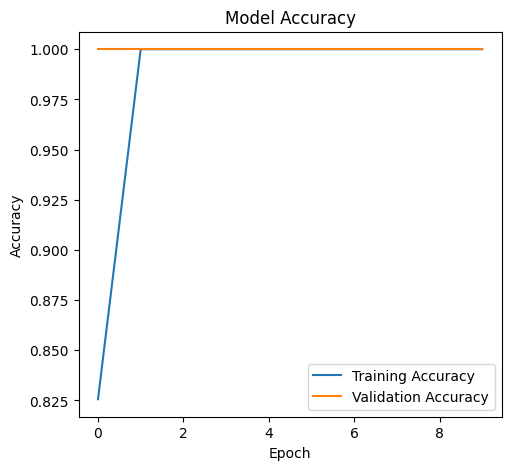

In [ ]:
# Visualize training history
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


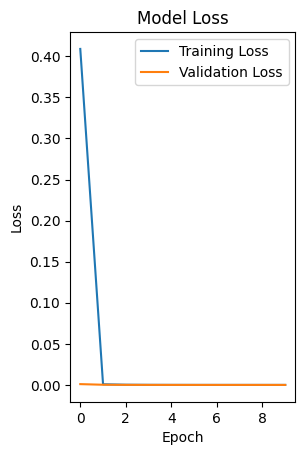

In [ ]:
# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# Predict Emoji for User Input
def predict_emoji(sentence):
    # Clean and preprocess the input
    cleaned_sentence = clean_text(sentence)
    sequence = tokenizer.texts_to_sequences([cleaned_sentence])
    padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post', truncating='post')
    # Predict the emoji
    prediction = model.predict(padded_sequence)
    predicted_index = np.argmax(prediction)
    predicted_emoji = label_encoder.inverse_transform([predicted_index])[0]
    return predicted_emoji

In [ ]:
# Test the prediction function
user_sentence = input("Enter a sentence: ")
predicted = predict_emoji(user_sentence)
print(f"The predicted emoji for your sentence is: {predicted}")